# Computational Laboratory 4CCP1300 Assessment
#### Module coordinator: George Booth (george.booth@kcl.ac.uk)

## Assessment information

In this jupyter notebook, you will find the guidelines and questions to be completed for the assignment for the computational modeling course. The assignment is due by **26$^{th}$ April 2021 at 12:00 (noon) BST**, and must be submitted via Turnitin on KEATS. This means that you must download this completed jupyter notebook from CoCalc, save it locally, and then submit it via KEATS. You can download your completed jupyter notebook from CoCalc once completed via the `Files` tab, and then clicking on the 'cloud' download button on the right hand side. Remember that submitting at the last moment might put you at risk of unexpected events (failing internet connection or other problems), so plan your time, and aim to submit well BEFORE the deadline. A section on KEATS will be opened soon to allow for your online submissions there. Please note that the completed jupyter notebooks should be submitted directly (this file ending .ipynb), rather than a pdf or text document, so that the code can be run by the markers and checked for accuracy of the code. Submitted work will be checked for similarity of the submitted notebooks to other students - plagiarism will not be tolerated. 

This document will provide a set of three problems that you will need to solve by using the knowledge built up from the notebooks and exercises completed during the course. You can revisit previous notebooks to refresh your knowledge from the course. The various parts of the problems should be submitted in separate code cells under each subsection of the questions. These cells should generate the results, and will build on the work of previous cells. Furthermore, text cells should be included with discussion and more information about each question where required. Note that the code itself (Python cells) will be marked, so please follow good coding practices outlined in the lectures (appropriate comments in the code, and clean, consistent and well structured code, with output appropriately formatted for readability). Note that all cells should execute properly without error messages given, such that when you go in the menu to `'Kernel'` then `'Restart & Run All'`, all the appropriate output from the code cells will be generated for marking each of the questions.

### Student Name: [Oskar Bzducha]
### k-number: [20071459]
### Email address: [k20071459@kcl.ac.uk]

## Problem 1: Molecular conformers

a) A molecular conformer is a particular shape or atomic arrangement that a molecule can adopt. Often molecules will flip between these two arrangements of their atoms. The aim in this problem is to model the changes in the numbers of molecules in different shapes (conformers) over a period of time. We assume that there are two conformers of a particular molecule which we want to model, conformer $A$ and conformer $B$, and the total number of molecules is fixed, so that $n_A + n_B$ remains the same. We assume that every hour, 20% of the current population of conformer $A$ will turn into conformer $B$. However, there is a chance of also transitioning in the other direction, and so each hour, 10% of the molecules in conformer $B$ turn back into conformer $A$. We assume that initially, there are 150 '$A$ molecules' and 150 '$B$ molecules'. We also assume that the changes in populations take place in discrete time intervals on the hour, each hour.

**In the first cell below (text / markdown), write an equation to determine the number of $A$-molecules ($n_A$) and $B$-molecules ($n_B$) after one hour, which should be $n_A = 135$ and $n_B=165$. Show that by writing this as a vector, $$ \begin{bmatrix} n_A \\ n_B \end{bmatrix}$$ this can be recast as a single matrix equation with a linear system of equations. This will involve a $2 \times 2$ matrix of fixed probabilities acting on this vector of current populations of $A$- and $B$-molecules, to give the populations in the next hour.** [3 marks]

$$ \begin{bmatrix} a&b \\ c&d \end{bmatrix} \begin{bmatrix} 150 \\ 150 \end{bmatrix} = \begin{bmatrix} 135 \\ 165 \end{bmatrix} $$
$$ \begin{bmatrix} 0.8&0.1 \\ 0.2&0.9 \end{bmatrix} \begin{bmatrix} 150 \\ 150 \end{bmatrix} = \begin{bmatrix} 135 \\ 165 \end{bmatrix} $$
$$ \begin{bmatrix} 0.8&0.1 \\ 0.2&0.9 \end{bmatrix} \begin{bmatrix} A \\ B \end{bmatrix} = \begin{bmatrix} n_A \\ n_B \end{bmatrix} $$

b) **Write a code cell below, to initialize a numpy array of the appropriate $2 \times 2$ matrix of probabilities assigned to the variable `P`, and the vector of current $A$ and $B$ populations, assigned to the variable `pop`, which should be initialized to $(150, 150)$. Calculate the matrix multiplication of `P` and the vector `pop` (use the `numpy` module to help), and therefore print out what the population of each type is after one hour (which should be $n_A = 135$ and $n_B=165$). Finally, have the code test whether the matrix `P` is a hermitian matrix or not, and print out a statement about this.** [6 marks]

In [3]:
import numpy as np

P = np.array([[0.8,0.1],[0.2,0.9]]) #initialises the matrix of the probabilities for A and B populations
pop = np.array([[150],[150]]) #initialises the starting population vector of A and B
pop_onehour = np.matmul(P,pop) #does the cross product of probability matrix with the initial population
print('The population after one hour is', pop_onehour)

def check_hermitian(p): #checks if the probability matrix is hermitian by calculating the transpose and comparing the values
    return np.allclose(P,P.T)

if check_hermitian(P) == True:
    print('p is a hermitian matrix')
else:
    print('p is not a hermitian matrix')

The population after one hour is [[135.]
 [165.]]
p is not a hermitian matrix


c) We are particularly interested in what happens after a long time - are there a steady number of $A$- vs. $B$-molecules, or does one conformer win out? If it is a 'steady state' (when the populations settle down to a constant over time), then what are these steady populations? Note that the probabilities remain the same each hour, so we can use the same probability matrix, `P`, and use it to update the populations many times. 

**Set up a loop in the code cell below, to find out what the populations are 72 hours after the initial condition. Each iteration, also check that the total number of molecules ($n_A + n_B$) is conserved, and equal to the original number (300, to within numerical precision). Write out the final number of $A-$ and $B-$molecules. Is this a stable number, or does it change after another day?** [6 marks]

In [7]:
import numpy as np

P = np.array([[0.8,0.1],[0.2,0.9]])
pop = np.array([[150],[150]])

def popchange(hours, current_pop): #a function that will find the new population after a number of hours
    for hour in range(hours): #repeats the process for the number of hours
        pop_one_hour = np.matmul(P, current_pop) #does the cross product of P and current population vectors
        current_pop = pop_one_hour #current population changed to new population
        
        total = sum(pop_one_hour) #sum of A and B is calculated
        if (299.9 < total < 300.1) == False: #checks if population is conservered between the molecules
            print('Total molecules are not conserved')
            
    global pop #globalised so we can assign to it a new value within the function
    pop = pop_one_hour #population matrix changed to the new population matrix
    return pop_one_hour

print('The population of A and B respectively is', popchange(72,pop))
print('The population of A and B respectively after another 24 hours is ',popchange(24,pop),' therefore the number of each molecule is stable')

The population of A and B respectively is [[100.]
 [200.]]
The population of A and B respectively after another 24 hours is  [[100.]
 [200.]]  therefore number of each molecule is stable


d) This long-time 'steady-state' behaviour can calculated directly, since we know that any vector where the application of a matrix results only in only a scaling of this vector (leaving the relative magnitudes of the elements of the vector unchanged) must be an eigenvector of the matrix. Specifically, if the populations are steady and not growing overall, the eigenvalue corresponding to this eigenvector must also be equal to 1. (Check the definition of an eigenvector to make sure you are happy with this logic). 

**In the code cell below, diagonalize the matrix `P`, and find the eigenvector corresponding to the eigenvalue equal to 1. Note that this eigenvector is not normalized corresponding to the initial conditions we set (i.e. that the total population is 300 at every time). Find and print out the factor that the eigenvector should be multiplied by, in order to ensure that the long-time steady state populations of $A$- and $B$-molecules matches the values obtained in part c). This number should be printed out to 4 decimal places.**

Note that you should use the `numpy` or `scipy` modules in order to do this diagonalization, though it may be worth checking that your code is doing what it should by comparing to a pen-and-paper diagonalization of the matrix. [6 marks]

In [3]:
import numpy as np
import scipy.linalg as sc

P = np.array([[0.8,0.1],[0.2,0.9]])

eigval,eigvec = sc.eig(P) #sc.eig creates a tuple with eigen values and vectors of P whch unpacks it and declares two variables: eigval and eigvec respectively
eigval = eigval.real #transformed the values into real numbers since the initial numbers have an imarginary component
diagonal = np.diag(eigval) #makes a diagonal matrix with the eigenvalues in the diagonal positions
print(diagonal)

eigvec1 = eigvec[:,1].reshape(2,1) #array is split so that were left eith the eigen vectors for the first eigen value
print('\n',eigvec1)

afactor = 100 / eigvec1[0] #finds factor to multiply eigen vector by to keep the population at a constant 100
bfactor = 200 / eigvec1[1] #finds factor to multiply eigen vector by to keep the population at a constant 200
print('\n', afactor)
print('\n', bfactor)

[[0.7 0. ]
 [0.  1. ]]

 [[-0.4472136 ]
 [-0.89442719]]

 [-223.60679775]

 [-223.60679775]


## Problem 2: The logistic map

In this problem we are considering the logistic map, a very simple sequence with very non-trivial behaviour. It simply updates a (scalar) variable, such that its next value depends solely on its current value. The sequence has the following form:

$x_{n+1} = a \times x_n \times (1-x_n)$ ,

where $x_n$ is the current variable in the range $[0,1]$, $x_{n+1}$ is the next value in the sequence, and $a$ is the growth rate which we will consider to be in the range $[0,4]$. This is often used to model systems which grow under a constraint of a finite number of resources, where e.g. $x_n$ represents the fraction of the total possible population size at a particular time. Here, the population will grow according to $x_n$, but be constrained by the $(1-x_n)$ term when $x_n$ gets too large. When $x_n=0$, the population is zero, and when $x_n=1$, the population is at its maximum possible size.  Indeed, since the resources are limited, the expansion is also proportional to $(1-x_n)$ and if the civilization reaches the maximum population of $x=1$ it will have exhausted all its resources and then collapses to $x=0$. Note that compared to the problem above, this sequence has non-linear (quadratic) terms in $x_n$, which has a profound affect, especially in the long-time limiting behaviour. As a background to this problem, I strongly recommend that you watch the following video [here](https://www.youtube.com/watch?v=ovJcsL7vyrk&list=WL&index=74&t=0s).

a) **Write a function called `find_fix_point` in the code cell below, which takes as its arguments, the growth rate $a$, and an initial value for $x_0$. It should return the convergence point of the sequence. We assume in this problem that the sequence reaches a converged state after $n=100$ iterations, so that the convergence point $x^*$ can be approximated by the $n=100$ element of the sequence ($x_{100}$).** [6 marks]

In [4]:
def find_fix_point(a,x_0):
    for i in range(100): #100 repetitions
        nextx = a * x_0 * (1 - x_0)
        x_0 = nextx #replaces x_0 with nextx
    return nextx
print(find_fix_point(1,0.5))

0.009395779870614648


b) We now want to consider how this 'fix point', $x^*$, varies for different growth rates, $a$, and different initial conditions, $x_0$. 

**In the code cell below, iterate over $1000$ uniformly spaced growth rates in the interval between `a_init` and `a_final`. This means that `a=a_init` for the first cycle of your `for` loop, and `a = a_final` for the last cycle. For each value of $a$, we also want to loop over $50$ possible values for $x_0$ in the range [0,1]. However rather than these taken to be uniformly spaced, these initial conditions should be chosen at random, using the `numpy.random` module. Store all of the values for $x^*$ in an array (found using the function defined in part a), and make a scatter plot of $x^*$ against $a$, for $a$ in the range $1.5$ to $4$. Be sure to always label your axes!** [9 marks]

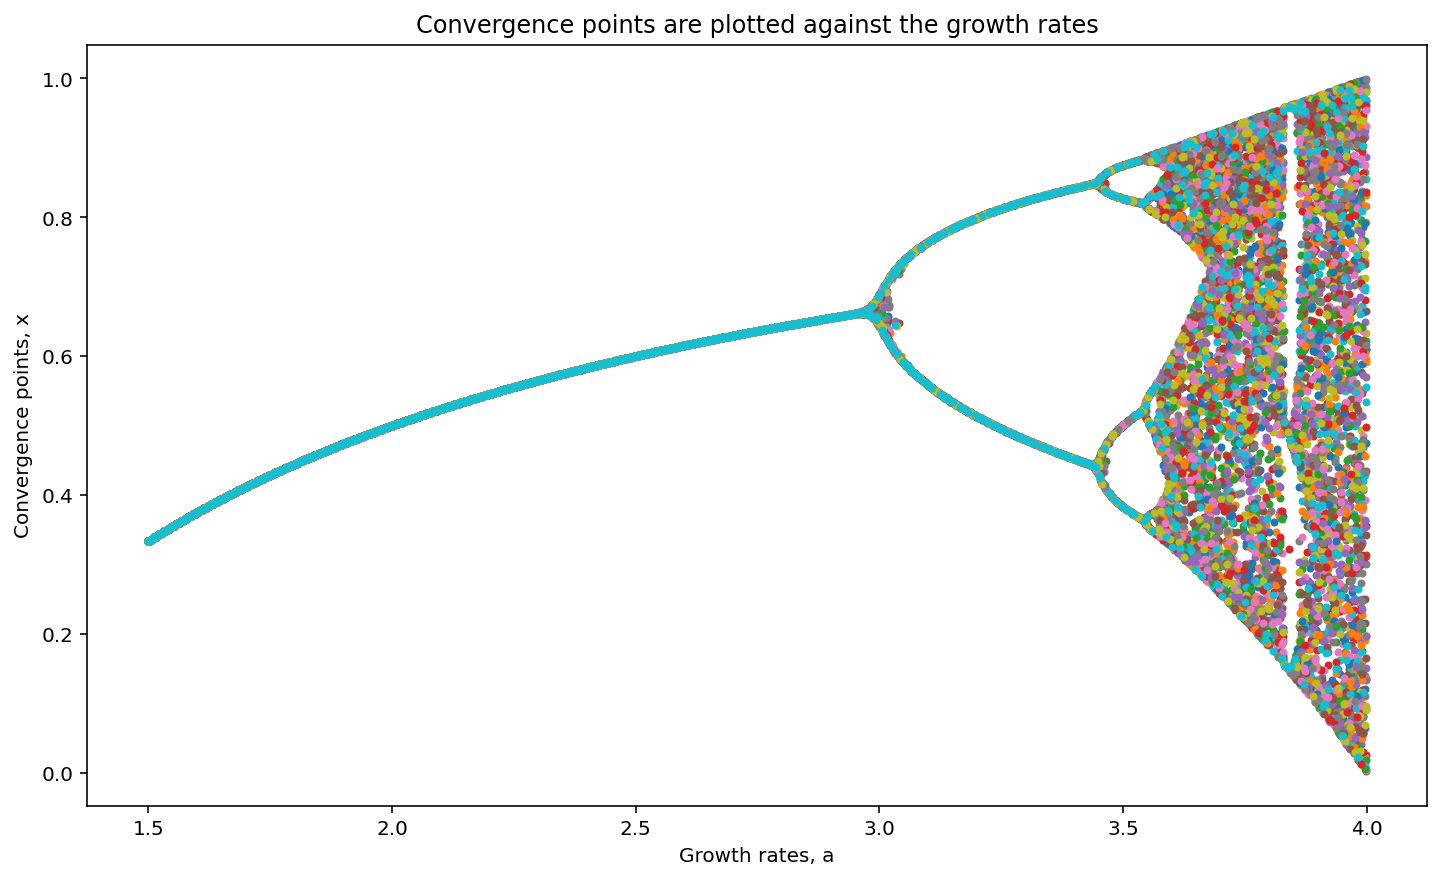

In [11]:
import numpy as np
import matplotlib.pyplot as mat

def find_fix_point(a,x_0):
    for i in range(100): #100 repetitions
        nextx = a * x_0 * (1 - x_0)
        x_0 = nextx #replaces x_0 with nextx
    return nextx

conpoints = [[]for i in range(1000)] #makes a 2D array with a total of 1000 sublists which store 50 convergence points in each sublist
sublist = 0 #sets the first index of the sublist

for a in np.arange(1.5,4,0.0025): #ranges from 1.5 to 4 at increments of 0.0025 resulting in 1000 repetitions
    for i in range(50):
        conpoint = find_fix_point(a,np.random.ranf()) #convergence plot
        conpoints[sublist].append(conpoint) #conpoint added to sublist in conpoints
    sublist += 1 #after for loop finished repeating the sublist index is repeaeted for the next growth rate

xpoints = np.arange(1.5,4,0.0025).tolist() #list of all growth rate points

mat.plot(xpoints,conpoints,'.') #plots points of convergence against points of growth rate so theyre on the y and x axis respectively
mat.title('Convergence points are plotted against the growth rates')
mat.xlabel('Growth rates, a') #labels x axis as growth rates
mat.ylabel('Convergence points, x') #labels y axis as convergence points
mat.show()

c) **Repeat the code of b) below, but now make a scatter plot of $x^*$ for $1000$ equally-spaced values of $a$ in the interval [3,4], and a final plot for $a$ in the interval [3.5,3.8].** [2 mark]

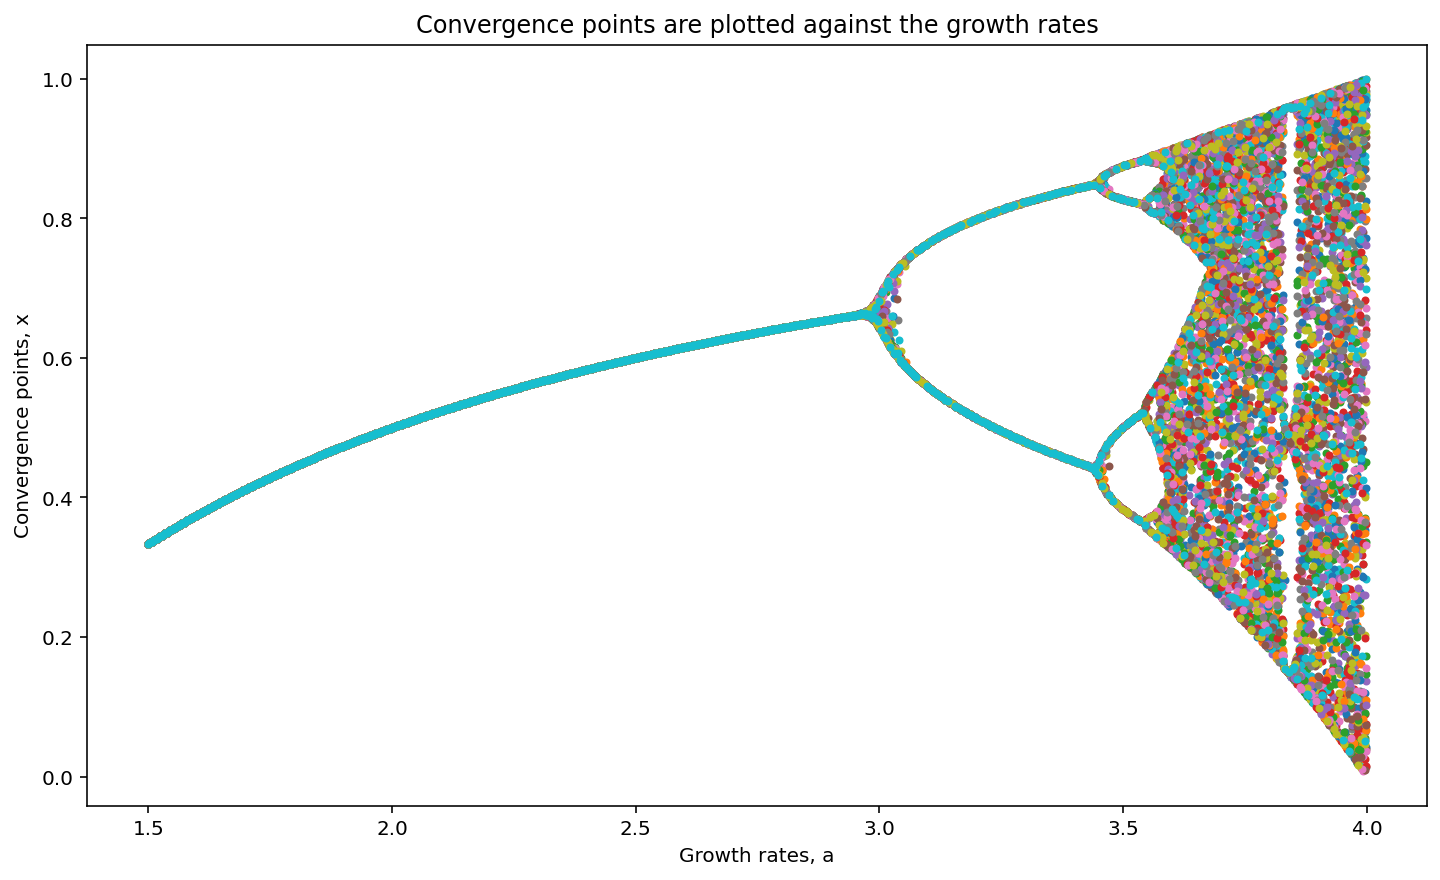

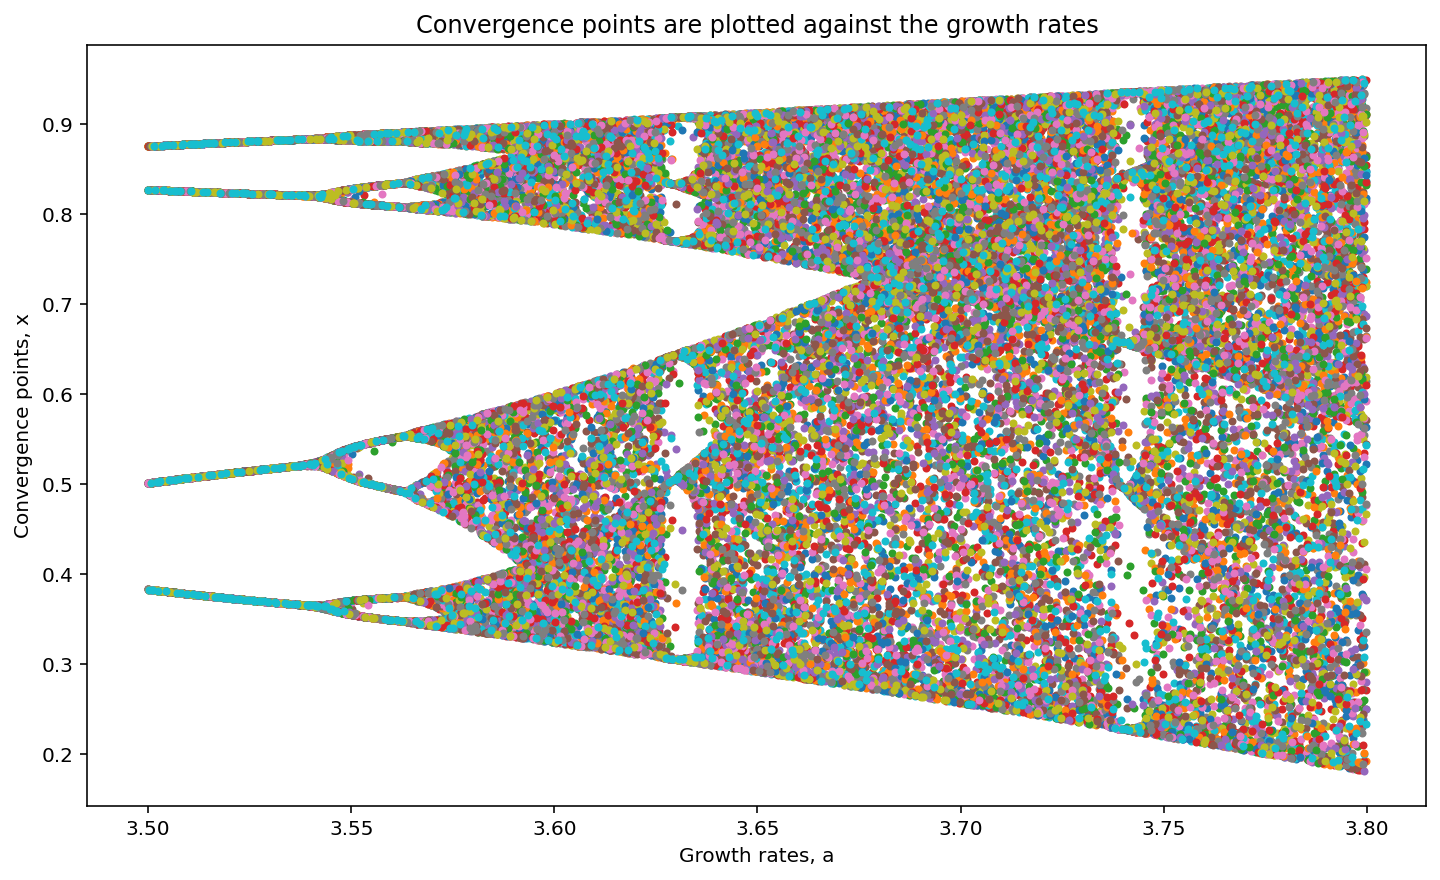

In [12]:
import numpy as np
import matplotlib.pyplot as mat

def find_fix_point(a,x_0):
    for i in range(100): #100 repetitions
        nextx = a * x_0 * (1 - x_0)
        x_0 = nextx #replaces x_0 with nextx
    return nextx

conpoints = [[]for i in range(1000)] #makes a 2D array with a total of 1000 sublists which store 50 convergence points in each sublist
sublist = 0 #sets the first index of the sublist

for a in np.arange(1.5,4,0.0025): #ranges from 1.5 to 4 at increments of 0.0025 resulting in 1000 repetitions
    for i in range(50):
        conpoint = find_fix_point(a,np.random.ranf()) #convergence plot
        conpoints[sublist].append(conpoint) #conpoint added to sublist in conpoints
    sublist += 1 #after for loop finished repeating the sublist index is repeaeted for the next growth rate

xpoints = np.arange(1.5,4,0.0025).tolist() #list of all growth rate points

mat.plot(xpoints,conpoints,'.') #plots points of convergence against points of growth rate so theyre on the y and x axis respectively
mat.title('Convergence points are plotted against the growth rates')
mat.xlabel('Growth rates, a') #labels x axis as growth rates
mat.ylabel('Convergence points, x') #labels y axis as convergence points
mat.show()

#a in the interval of 3.5-3.8
conpoints = [[]for i in range(1000)] #makes a 2D array with a total of 1000 sublists which store 50 convergence points in each sublist
sublist = 0 #sets the first index of the sublist

for a in np.arange(3.5,3.8,0.0003): #ranges from 3.5 to 3.8 at increments of 0.0003 resulting in 1000 repetitions
    for i in range(50):
        conpoint = find_fix_point(a,np.random.ranf()) #convergence plot
        conpoints[sublist].append(conpoint) #conpoint added to sublist in conpoints
    sublist += 1 #after for loop finished repeating the sublist index is repeaeted for the next growth rate

xpoints = np.arange(3.5,3.8,0.0003).tolist() #list of all growth rate points

mat.plot(xpoints,conpoints,'.') #plots points of convergence against points of growth rate so theyre on the y and x axis respectively
mat.title('Convergence points are plotted against the growth rates')
mat.xlabel('Growth rates, a') #labels x axis as growth rates
mat.ylabel('Convergence points, x') #labels y axis as convergence points
mat.show()

d) **Discuss the results obtained in a Markdown cell. For which values of $a$ do you obtain more than one fix point? Discuss the observed trend as $a$ is increased, and the consequence of the accumulation of fix points for the stability of a growing population. Why are the long-time trends of this sequence so different to the previous question.** [2 marks]

For a>3 there are several fixed points. Between a=3 and a=3.5 there appears to be 2 fixed points and from a=3.5 to a=3.55 this turns into 4. When a>3.55 the pattern appears to chaotically spiral outwards with no visibly fixed trend pattern. However, this returns to a brief period of ordered chaos at around a=3.75 - a=3.8 where there appears to be 2 or 3 fixed points. After this it returns to unorderly chaos  and leaves no pattern. The consequences for this is that as a>3 the population number is far less predictable and is far more unstable which varies over time. The long time trends are different due to the non-linear terms in x_n as well as the pervious question had an eventual convergence to a point point.

## Problem 3: Projectile motion

One of the big challenges in mathematical physics is the solution to differential equations, such as Newtons equations. In this problem, we aim to simulate the motion of a projectile under the force of gravity. We are going to use the Euler method to integrate these equations in time to follow the trajectory of the projectile.

In order to do this, we note that we can decouple the $x$ (horizontal) and $y$ (vertical) motion. We therefore aim to end up with two arrays for the $x$-coordinates and $y$-coordinates for each time step that we consider (as well as another set of arrays for the components of the velocity). Finally, to solve differential equations, we will need to specify an initial condition, i.e. the initial $x$ and $y$ position for the projectile, as well as the initial velocity in each direction. Considering the propagation in the $y$-direction (the $x$ direction is simple, as there is no acceleration and the velocity is therefore constant), we can write the expression for the propagation of the coupled $y$-position and $y$-velocity of the particle as

$\dot{y}(t + \Delta t) = \dot{y}(t) - \Delta t \times g$

$y(t + \Delta t) = y(t) + \Delta t \times \dot{y}(t) $

With these two equations, we can predict the position and velocity of the particle at the next time point, from knowledge of the position and velocity at the previous time point.

a) **Initialise variables denoting the timestep for the integration, `dt`, the acceleration due to gravity, `g=9.8`ms$^{-2}$, and the maximum time to integrate, `t_max`. Calculate the number of timesteps required simulate this maximum time, and initialize numpy arrays to hold the $x$- and $y$- positions and velocities for each time step. It will also be worth initializing variables to store the initial speed, height and angle of the trajectory rather than hard coding them, so that these can be simply changed later on.**

**Initialize the projectile as starting at ground level, and fired at a speed of 100ms$^{-1}$ at an angle of 30$^{\circ}$ above ground level, choosing `dt=0.01` seconds. Print out the maximum height above ground level that the projectile reaches, the maximum distance the projectile travels before it hits the ground, and the time that the projectile travels.** [10 marks]

In [14]:
import numpy as np

x0 = 0 #sets inital coordinates and speed
y0 = 0
v0 = 100
angle = 30 * np.pi/180 #calculates optimal angle
dt = 0.01 #sets interval of time
g = 9.8

t_max = 2 * v0 * np.sin(angle)/g #calculates the max flight time
timesteps = int(t_max / dt) #calculting the times steps for max time

x = np.zeros(timesteps+1)
y = np.zeros(timesteps+1)
vx = np.zeros(timesteps+1)
vy = np.zeros(timesteps+1)

vx[:] = v0*np.cos(angle)
vy[:] = v0*np.sin(angle)

for i in range(timesteps):
    x[i+1] = x[i] +dt*vx[i]
    vy[i+1] = vy[i] - dt*g
    y[i+1] = y[i] + dt*vy[i] #calculating all the points before hitting the ground at t_max time

print('max height was',round(max(y),2),'m.')
print('max distance before hitting the ground was',round(max(x),2),'m.')
print('max time travelled was ',round(t_max,2),'s.')

max height was 127.8 m.
max distance before hitting the ground was 883.35 m.
max time travelled was  10.2 s.


b) **In the code cell below, copy the code from part a) and plot the trajectory as $x$- against $y$-position for the projectile until it reaches the ground. Include axes labels.** [3 marks]

max height was 127.8 m.
max distance before hitting the ground was 883.35 m.
max time travelled was  10.2 s.


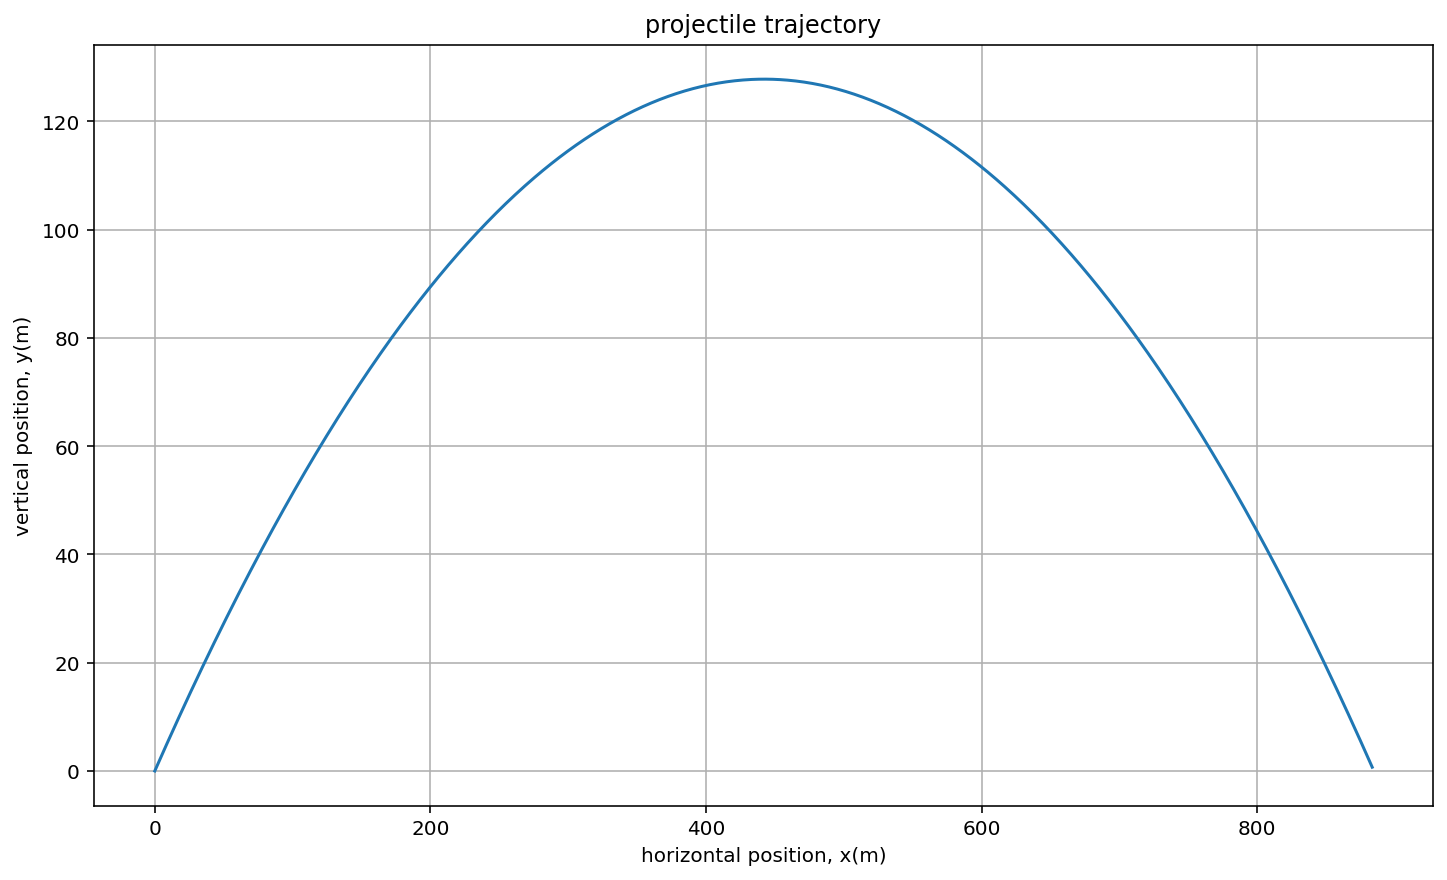

In [15]:
import numpy as np
import matplotlib.pyplot as mat

x0 = 0
y0 = 0
v0 = 100
angle = 30 * np.pi/180
dt = 0.01
g = 9.8

t_max = 2 * v0 * np.sin(angle)/g
timesteps = int(t_max / dt)

x = np.zeros(timesteps+1)
y = np.zeros(timesteps+1)
vx = np.zeros(timesteps+1)
vy = np.zeros(timesteps+1)

vx[:] = v0*np.cos(angle)
vy[:] = v0*np.sin(angle)

for i in range(timesteps):
    x[i+1] = x[i] +dt*vx[i]
    vy[i+1] = vy[i] - dt*g
    y[i+1] = y[i] + dt*vy[i]

print('max height was',round(max(y),2),'m.')
print('max distance before hitting the ground was',round(max(x),2),'m.')
print('max time travelled was ',round(t_max,2),'s.')

mat.plot(x,y) #plots points on the graph
mat.xlabel('horizontal position, x(m)')
mat.ylabel('vertical position, y(m)')
mat.title('projectile trajectory')
mat.grid()
mat.show()

c) **The total energy of the projectile at each point in time can be calculated as the sum of its kinetic and potential energy. Find the energy of the projectile at each point in time in another array, and create a labelled plot of it as a function of time.**

**In a text/markdown cell underneath, discuss what this plot is showing, and discuss what it should look like for the exact propagation of the projectile. Describe how the plot changes as the timestep, $\Delta t$ is changed, and why. What is the fundamental approximation made in the numerical solution we have implemented?** [9 marks]

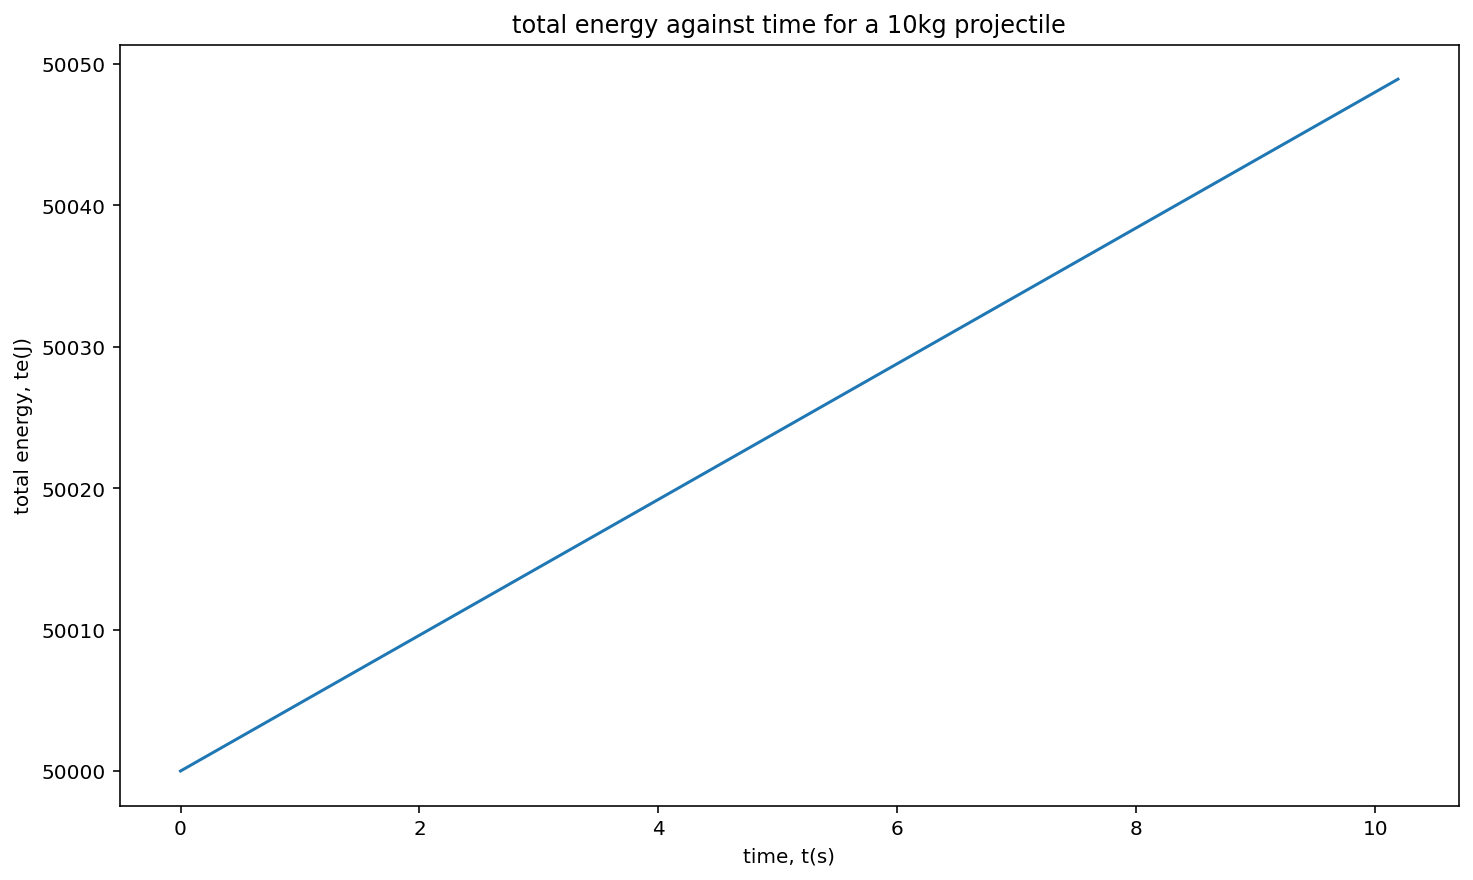

In [16]:
total_energies = np.zeros(timesteps+1)

for i in range(timesteps):
    v = (vx[i]**2 + vy[i]**2)**0.5
    ke = 0.5*10*v**2 #calculates kinetic energy
    gpe = 10*g*y[i] #calculates gravitational potential energy
    te = ke +gpe
    total_energies[i] = te

total_energies = total_energies[:-1]
times = np.arange(0,t_max,dt).tolist()
times = times[:-1]

mat.plot(times,total_energies)
mat.xlabel('time, t(s)')
mat.ylabel('total energy, te(J)')
mat.title('total energy against time for a 10kg projectile')
mat.show()